# T12B model: neutrino masses

The idea is to check the anality expresion for neutrino masses with SPHENO. I will use a benchmark point

### Rotation of no hermitian mass matrices

Hermitian term:
    
$\mathcal{L}_{\text{mas}} = \psi^{\dagger} M \psi$
$\to$
$M_{\text{diag}}=U^{-1}MU$

No hermitian term:
 
$\mathcal{L}_{\text{mas}} = \psi_R^{\dagger} M \psi_L = \psi_1^{\dagger} M \psi_2$
$\to$ $\color{red}{M_{\text{diag}}^2=V^{-1}MM^TV = U^{-1}M^TMU}$


ie. the $V$ and $U$ matricess diagonalize the matrices $MM^T$ and $M^TM$ respectively

such that: $\Psi_1^i=V_{ij}\psi_1^j$ and $\Psi_2^i=U_{ij}\psi_2^j$

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time

%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
#good plots
plt.rcParams.update({'font.size': 18}) 
#plt.rc('font',size='18')

In [3]:
Gf = 1.16637000E-05
vevSM = 1./np.sqrt(np.sqrt(2.)*Gf)

# Neutrino masses for a benchmark point

In [4]:
#!/usr/bin/env python
import pyslha
import pyT12B_LesHouches_generator
import subprocess
import sys
import NEUTRINO2018
import neutrino_analytic3
import Yukawa_fij

Runing firs time

In [5]:
x = []

Mmax = 50

for i in range(0,Mmax):
    print(i)
    #Open for the first time
    xdict = pyT12B_LesHouches_generator.buildSLHAinFile()

    L1sm = 1.3e-1 #Warning
    L61 = 1e-4
    L62 = 1e-4
    L63 = 1e-4
    L71 = 1e-4
    L72 = 1e-4
    L73 = 1e-4
    mu31 = 1.01e6
    mu32 = 2.01e6
    mu33 = 1.01e8

    MN = np.exp(np.random.uniform(np.log(100.),np.log(200.)))
    MPsi = np.exp(np.random.uniform(np.log(200.),np.log(2000.)))
    Meta = np.exp(np.random.uniform(np.log(300.),np.log(2000.)))
    l1 = np.exp(np.random.uniform(np.log(1.0e+3),np.log(1.0e+6)))
    l2 = np.exp(np.random.uniform(np.log(1.0e+3),np.log(1.0e+6)))
    y1 = np.exp(np.random.uniform(np.log(1.0e-3),np.log(1.0e-6)))
    y2 = np.exp(np.random.uniform(np.log(1.0e-3),np.log(1.0e-6)))

    # Modific the LesHouches         
    xdict.blocks['MINPAR'].entries[1]='%.6E    # lambda1Input' %L1sm     
    xdict.blocks['MINPAR'].entries[2]='%.6E    # lambda61Input' %L61
    xdict.blocks['MINPAR'].entries[3]='%.6E    # lambda62Input' %L62
    xdict.blocks['MINPAR'].entries[4]='%.6E    # lambda63Input' %L63
    xdict.blocks['MINPAR'].entries[5]='%.6E    # lambda71Input' %L71   
    xdict.blocks['MINPAR'].entries[6]='%.6E    # lambda72Input' %L72   
    xdict.blocks['MINPAR'].entries[7]='%.6E    # lambda73Input' %L73       
    xdict.blocks['MINPAR'].entries[8]='%.6E    # mu31Input' %mu31
    xdict.blocks['MINPAR'].entries[9]='%.6E    # mu32Input' %mu32
    xdict.blocks['MINPAR'].entries[10]='%.6E    # mu33Input' %mu33

    xdict.blocks['MKIN'].entries[1]='%.6E    # MK' %1.0e+6

    xdict.blocks['MNIN'].entries[1]='%.6E    # MN' %MN
    xdict.blocks['MR1IN'].entries[1]='%.6E    # Mr1' %MPsi
    xdict.blocks['MR2IN'].entries[1]='%.6E    # Mr2' %Meta
    xdict.blocks['YLR1IN'].entries[1]='%.6E    # YlR1' %l1
    xdict.blocks['YLR2IN'].entries[1]='%.6E    # YlR2' %l2
    xdict.blocks['YYR1IN'].entries[1]='%.6E    # YyR1' %y1
    xdict.blocks['YYR2IN'].entries[1]='%.6E    # YyR2' %y2

    xdict.blocks['SPHENOINPUT'].entries[55]='%.i             # Calculate loop corrected masses' %0

    #Write the Leshouches file for the first time
    pyslha.writeSLHAFile('LesHouches.in.T12B_low',xdict)    

    #copy file
    subprocess.getoutput('cp LesHouches.in.T12B_low LesHouches.in.T12B_low_tree_level')
    
    #run SPheno for the first time
    spheno = subprocess.getoutput('../.././SPheno-4.0.3/bin/SPhenoT12B LesHouches.in.T12B_low')    
    SPheno_output = subprocess.getoutput('cat SPheno.spc.T12B')

    #Spheno to one loop???
    MS1 = eval(SPheno_output.split('# Mass spectrum')[1].split()[10])
    MS2 = eval(SPheno_output.split('# Mass spectrum')[1].split()[14])
    MS3 = eval(SPheno_output.split('# Mass spectrum')[1].split()[18])
    #print(MS1,MS2,MS3)

    if MS1 == 0.0 or MS2 == 0.0:
        #continue
        #Anality to tree level
        MS1 = np.sqrt(mu31 + L71*vevSM**2/2.)
        MS2 = np.sqrt(mu32 + L72*vevSM**2/2.)
        MS3 = np.sqrt(mu33 + L73*vevSM**2/2.)

    mx1 = eval(SPheno_output.split('Fe_3')[1].split()[1])
    mx2 = eval(SPheno_output.split('Fe_3')[1].split()[5])
    mx3 = eval(SPheno_output.split('Fe_3')[1].split()[9])

    U11 = eval(SPheno_output.split('Block LNEUTROMIX')[1].split()[6])
    U12 = eval(SPheno_output.split('Block LNEUTROMIX')[1].split()[11])
    U13 = eval(SPheno_output.split('Block LNEUTROMIX')[1].split()[16])
    U21 = eval(SPheno_output.split('Block LNEUTROMIX')[1].split()[21])
    U22 = eval(SPheno_output.split('Block LNEUTROMIX')[1].split()[26])
    U23 = eval(SPheno_output.split('Block LNEUTROMIX')[1].split()[31])
    U31 = eval(SPheno_output.split('Block LNEUTROMIX')[1].split()[36])
    U32 = eval(SPheno_output.split('Block LNEUTROMIX')[1].split()[41])
    U33 = eval(SPheno_output.split('Block LNEUTROMIX')[1].split()[46])

    V11 = eval(SPheno_output.split('Block RNEUTROMIX')[1].split()[6])
    V12 = eval(SPheno_output.split('Block RNEUTROMIX')[1].split()[11])
    V13 = eval(SPheno_output.split('Block RNEUTROMIX')[1].split()[16])
    V21 = eval(SPheno_output.split('Block RNEUTROMIX')[1].split()[21])
    V22 = eval(SPheno_output.split('Block RNEUTROMIX')[1].split()[26])
    V23 = eval(SPheno_output.split('Block RNEUTROMIX')[1].split()[31])
    V31 = eval(SPheno_output.split('Block RNEUTROMIX')[1].split()[36])
    V32 = eval(SPheno_output.split('Block RNEUTROMIX')[1].split()[41])
    V33 = eval(SPheno_output.split('Block RNEUTROMIX')[1].split()[46])

    L1 = neutrino_analytic3.LAMBDA(mx1, MS1, V21, U11) + neutrino_analytic3.LAMBDA(mx2, MS1, V22, U21) +\
            neutrino_analytic3.LAMBDA(mx3, MS1, V32, U31)
    L2 = neutrino_analytic3.LAMBDA(mx1, MS2, V21, U11) + neutrino_analytic3.LAMBDA(mx2, MS2, V22, U21) +\
            neutrino_analytic3.LAMBDA(mx3, MS2, V32, U31) 
    L3 = neutrino_analytic3.LAMBDA(mx1, MS3, V21, U11) + neutrino_analytic3.LAMBDA(mx2, MS3, V22, U21) +\
            neutrino_analytic3.LAMBDA(mx3, MS3, V32, U31) 

    #print("Li=",L1,L2,L3)
    Linv = np.array([[1./L1 ,0.,0],[0.,1./L2,0.],[0.,0.,1./L3]])

    out = Yukawa_fij.yuk_f()

    h = out[0]
    f = np.dot(out[1],Linv)
    mnu1 = ((out[2][1])[0,0])**2
    mnu2 = ((out[2][1])[1,1])**2
    mnu3 = ((out[2][1])[2,2])**2
  
    #ALGORITM:
    f11 = f[0,0]
    f21 = f[1,0]
    f31 = f[2,0]

    f12 = f[0,1]
    f22 = f[1,1]
    f32 = f[2,1]

    f13 = f[0,2]    
    f23 = f[1,2]
    f33 = f[2,2]

    h11 = h[0,0]
    h21 = h[1,0]
    h31 = h[2,0]

    h12 = h[0,1]
    h22 = h[1,1]
    h32 = h[2,1]

    h13 = h[0,2]
    h23 = h[1,2]
    h33 = h[2,2]

    #Open for the second time
    xdict = pyT12B_LesHouches_generator.buildSLHAinFile()

    # Modific the LesHouches         
    xdict.blocks['MINPAR'].entries[1]='%.6E    # lambda1Input' %L1sm     
    xdict.blocks['MINPAR'].entries[2]='%.6E    # lambda61Input' %L61
    xdict.blocks['MINPAR'].entries[3]='%.6E    # lambda62Input' %L62
    xdict.blocks['MINPAR'].entries[4]='%.6E    # lambda63Input' %L63
    xdict.blocks['MINPAR'].entries[5]='%.6E    # lambda71Input' %L71   
    xdict.blocks['MINPAR'].entries[6]='%.6E    # lambda72Input' %L72   
    xdict.blocks['MINPAR'].entries[7]='%.6E    # lambda73Input' %L73       
    xdict.blocks['MINPAR'].entries[8]='%.6E    # mu31Input' %mu31
    xdict.blocks['MINPAR'].entries[9]='%.6E    # mu32Input' %mu32
    xdict.blocks['MINPAR'].entries[10]='%.6E    # mu33Input' %mu33
    MK = 1.0e+6
    xdict.blocks['MKIN'].entries[1]='%.6E    # MK' %MK

    xdict.blocks['MNIN'].entries[1]='%.6E    # MN' %MN
    xdict.blocks['MR1IN'].entries[1]='%.6E    # Mr1' %MPsi
    xdict.blocks['MR2IN'].entries[1]='%.6E    # Mr2' %Meta
    xdict.blocks['YLR1IN'].entries[1]='%.6E    # YlR1' %l1
    xdict.blocks['YLR2IN'].entries[1]='%.6E    # YlR2' %l2
    xdict.blocks['YYR1IN'].entries[1]='%.6E    # YyR1' %y1
    xdict.blocks['YYR2IN'].entries[1]='%.6E    # YyR2' %y2

    xdict.blocks['YHR1IN'].entries[1]='%.6E    # YhR1(1)' %h11 
    xdict.blocks['YHR1IN'].entries[2]='%.6E    # YhR1(2)' %h21
    xdict.blocks['YHR1IN'].entries[3]='%.6E    # YhR1(3)' %h31

    xdict.blocks['YHR2IN'].entries[1]='%.6E    # YhR2(1)' %h12 
    xdict.blocks['YHR2IN'].entries[2]='%.6E    # YhR2(2)' %h22
    xdict.blocks['YHR2IN'].entries[3]='%.6E    # YhR2(3)' %h32

    xdict.blocks['YHR3IN'].entries[1]='%.6E    # YhR3(1)' %h13 
    xdict.blocks['YHR3IN'].entries[2]='%.6E    # YhR3(2)' %h23
    xdict.blocks['YHR3IN'].entries[3]='%.6E    # YhR3(3)' %h33

    xdict.blocks['YFR1IN'].entries[1]='%.6E    # YfR1(1)' %f11 
    xdict.blocks['YFR1IN'].entries[2]='%.6E    # YfR1(2)' %f21
    xdict.blocks['YFR1IN'].entries[3]='%.6E    # YfR1(3)' %f31

    xdict.blocks['YFR2IN'].entries[1]='%.6E    # YfR2(1)' %f12 
    xdict.blocks['YFR2IN'].entries[2]='%.6E    # YfR2(2)' %f22
    xdict.blocks['YFR2IN'].entries[3]='%.6E    # YfR2(3)' %f32

    xdict.blocks['YFR3IN'].entries[1]='%.6E    # YfR3(1)' %f13 
    xdict.blocks['YFR3IN'].entries[2]='%.6E    # YfR3(2)' %f23
    xdict.blocks['YFR3IN'].entries[3]='%.6E    # YfR3(3)' %f33

    #Write the Leshouches file for the second time
    pyslha.writeSLHAFile('LesHouches.in.T12B_low',xdict)      
    
   
    #run SPheno for the second time
    #print("runing second time")
    spheno = subprocess.getoutput('../.././SPheno-4.0.3/bin/SPhenoT12B LesHouches.in.T12B_low')   
   
    SPheno_output = subprocess.getoutput('cat SPheno.spc.T12B')

    ##++++++++++ Neutrinos +++++++++++++++++++++++++++++++++
    if SPheno_output.split('# Fk')[1].split()[1] == "NaN":
        mv1 = 0.
    else: 
        mv1 = eval(SPheno_output.split('# Fk')[1].split()[1])           
    mv2 = eval(SPheno_output.split('# Fk')[1].split()[5])       
    mv3 = eval(SPheno_output.split('# Fk')[1].split()[9])  
    #print("mvi=",mv1,mv2,mv3)
    
    x.append([L61,L62,L63,L71,L72,L73,mu31,mu32,mu33,MN,MPsi,Meta,l1,l2,y1,y2,MS1,MS2,MS3,mx1,mx2,mx3,\
              U11,U12,U13,U21,U22,U23,U31,U32,U33,V11,V12,V13,V21,V22,V23,V31,V32,V33,L1,L2,L3,MK,\
              h11,h21,h31,h12,h22,h32,h13,h23,h33,f11,f21,f31,f12,f22,f32,f13,f23,f33,mnu1,mnu2,mnu3,mv1,mv2,mv3])

x=np.asarray(x)
    
xd=pd.DataFrame(x,columns=['L61','L62','L63','L71','L72','L73','mu31','mu32','mu33','MN','MPsi','Meta',\
                           'l1','l2','y1','y2','MS1','MS2','MS3','mx1','mx2','mx3','U11','U12','U13','U21',\
                           'U22','U23','U31','U32','U33','V11','V12','V13','V21','V22','V23','V31','V32','V33',\
                           'L1','L2','L3','MK','h11','h21','h31','h12','h22','h32','h13','h23','h33','f11','f21',\
                           'f31','f12','f22','f32','f13','f23','f33','mnu1','mnu2','mnu3','mv1','mv2','mv3'])       

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [6]:
xd[:2]

,L61,L62,L63,L71,L72,L73,mu31,mu32,mu33,MN,...,f32,f13,f23,f33,mnu1,mnu2,mnu3,mv1,mv2,mv3
0,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,1010000.0,2010000.0,101000000.0,144.288151,...,2.087939e-05,0.0,4.634434e-06,7.840906e-06,1.000000e-20,8.830355e-12,4.913706e-11,0.0,2.367717e-12,1.568872e-11
1,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,1010000.0,2010000.0,101000000.0,131.945239,...,2.140955e-07,0.0,-8.413462e-07,-6.957293e-07,1.000000e-20,8.558496e-12,5.032075e-11,0.0,1.085723e-11,8.235397e-11


In [7]:
print("EXPERIMENTAL:")
print("mnu2=",mnu2,"mnu3=",mnu3)
print("===============================================")
print("SPHENO:")
print("mv2=",mv2,"mv3=",mv3)
print("===============================================")

EXPERIMENTAL:
mnu2= 8.94410543782e-12 mnu3= 4.97100911981e-11
SPHENO:
mv2= 2.8374223e-12 mv3= 2.87037308e-11


In [8]:
'''
EXPERIMENTAL:
mnu2= 9.00433694547e-12 mnu3= 4.94869698923e-11
===============================================
SPHENO:
mv2= 8.62853161e-12 mv3= 4.64737016e-11
===============================================
'''

'\nEXPERIMENTAL:\nmnu2= 9.00433694547e-12 mnu3= 4.94869698923e-11\n===============================================\nSPHENO:\nmv2= 8.62853161e-12 mv3= 4.64737016e-11\n===============================================\n'

In [9]:
''' When MS1 = 0.0 in the evolution
EXPERIMENTAL:
mnu2= 8.8585432847e-12 mnu3= 4.96692607977e-11
===============================================
SPHENO:
mv2= 9.66256707e-12 mv3= 5.43694068e-11
===============================================
'''

' When MS1 = 0.0 in the evolution\nEXPERIMENTAL:\nmnu2= 8.8585432847e-12 mnu3= 4.96692607977e-11\n===============================================\nSPHENO:\nmv2= 9.66256707e-12 mv3= 5.43694068e-11\n===============================================\n'

In [10]:
'''
EXPERIMENTAL:
mnu2= 8.65355883888e-12 mnu3= 5.09356225059e-11
===============================================
SPHENO:
mv2= 8.28696251e-12 mv3= 4.88389875e-11
===============================================
'''

'\nEXPERIMENTAL:\nmnu2= 8.65355883888e-12 mnu3= 5.09356225059e-11\n===============================================\nSPHENO:\nmv2= 8.28696251e-12 mv3= 4.88389875e-11\n===============================================\n'

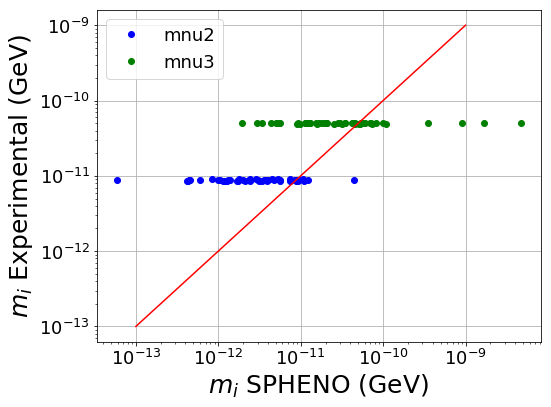

In [11]:
plt.figure(figsize=(8,6))

#plt.loglog(xd.mv1,yd.mn1,'ro')
plt.loglog(xd.mv2,xd.mnu2,'bo')
plt.loglog(xd.mv3,xd.mnu3,'go')

a = np.linspace(1e-13,1e-9,10)
plt.plot(a,a,'r-')

plt.xlabel(r'$m_i$ SPHENO (GeV)',size=25)
plt.ylabel(r'$m_i$ Experimental (GeV)',size=25)
plt.legend()

plt.grid()

plt.tight_layout()
#plt.savefig('plots/neutrino_masses_NH.pdf')

# 25 % error acceptance

In [12]:
zd = xd[np.logical_and(np.abs(xd.mnu2 - xd.mv2)/xd.mnu2*100. < 25.,np.abs(xd.mnu3 - xd.mv3)/xd.mnu3*100. < 25.)]

In [13]:
zd.shape

(5, 68)

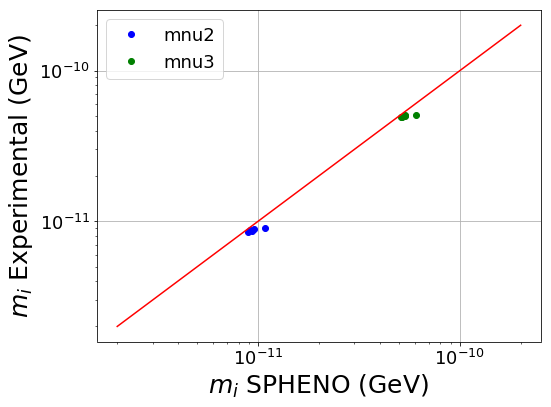

In [14]:
plt.figure(figsize=(8,6))

plt.loglog(zd.mv2,zd.mnu2,'bo')
plt.loglog(zd.mv3,zd.mnu3,'go')

a = np.linspace(2e-12,2e-10,10)
plt.plot(a,a,'r-')

plt.xlabel(r'$m_i$ SPHENO (GeV)',size=25)
plt.ylabel(r'$m_i$ Experimental (GeV)',size=25)
plt.legend()

plt.grid()

plt.tight_layout()
#plt.savefig('plots/neutrino_masses_NH.pdf')

In [15]:
#Concatenar files desde Jupyter

xd0 = pd.read_csv('good_neutrinos.csv')
del[xd0['Unnamed: 0']]

xd = pd.concat([xd0, zd],ignore_index=True)

print(xd0.shape,zd.shape,xd.shape)

#save file
xd.to_csv('good_neutrinos.csv')

(51, 68) (5, 68) (56, 68)


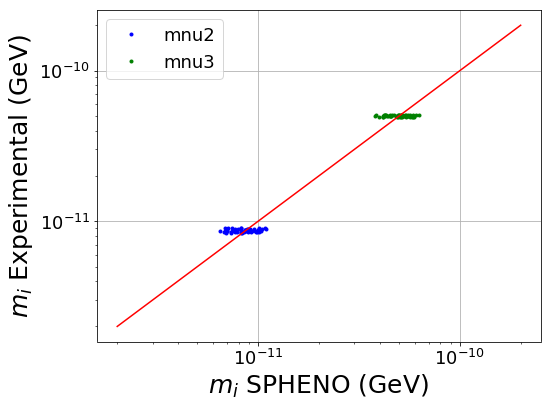

In [19]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mv2,xd.mnu2,'b.')
plt.loglog(xd.mv3,xd.mnu3,'g.')

a = np.linspace(2e-12,2e-10,10)
plt.plot(a,a,'r-')

plt.xlabel(r'$m_i$ SPHENO (GeV)',size=25)
plt.ylabel(r'$m_i$ Experimental (GeV)',size=25)
plt.legend()

plt.grid()

plt.tight_layout()
#plt.savefig('plots/neutrino_masses_NH.pdf')

In [17]:
xd[['mnu2','mv2','mnu3','mv3']]

,mnu2,mv2,mnu3,mv3
0,8.752030e-12,8.567633e-12,5.047705e-11,4.738314e-11
1,8.765270e-12,9.944956e-12,4.997950e-11,5.559224e-11
2,8.500989e-12,9.258990e-12,5.000427e-11,5.492049e-11
3,8.623974e-12,6.471694e-12,4.913557e-11,3.982050e-11
4,8.617622e-12,7.436433e-12,4.974806e-11,4.353755e-11
5,8.662850e-12,6.857095e-12,5.030219e-11,4.226648e-11
6,8.634578e-12,8.185355e-12,4.925965e-11,4.162521e-11
7,8.437425e-12,7.661119e-12,4.986931e-11,4.487023e-11
8,8.401965e-12,8.341639e-12,5.095481e-11,4.979287e-11
9,8.680474e-12,8.616978e-12,5.066166e-11,5.010976e-11


In [18]:
xd[['MN', 'MPsi','Meta', 'l1', 'l2', 'y1', 'y2','MS1', 'MS2', 'MS3', 'mx1','mx2', 'mx3']][:3]

,MN,MPsi,Meta,l1,l2,y1,y2,MS1,MS2,MS3,mx1,mx2,mx3
0,174.871593,675.324274,1536.183204,341932.408610,17372.780175,0.000001,0.000556,1004.98907,1417.74576,10049.8758,174.8716,17369.52840,341936.683
1,180.487416,1750.686200,352.006311,19006.556980,212599.776426,0.000001,0.000081,1004.98907,1417.74576,10049.8758,180.4874,19002.96230,212607.621
2,138.277498,694.521451,803.819378,7170.857368,149262.665372,0.000001,0.000005,1004.98907,1417.74576,10049.8758,138.2775,7166.92625,149266.669
